## 背景知识

EM算法（Expectation Maximization Algorithm）是一种迭代的优化算法，最初是为了解决数据缺失情况下的参数估计问题，其作为一种数据添加算法，在近几十年得到迅速的发展，主要源于当前科学研究以及各方面实际应用中数据量越来越大的情况下，经常存在数据缺失或者不可用的的问题。随着理论的发展，EM算法己经不单单用在处理缺失数据的问题，运用这种思想，它所能处理的问题更加广泛。有时候缺失数据并非是真的缺少了，而是为了简化问题而采取的策略，这时EM算法被称为数据添加技术，所添加的数据通常被称为“潜在数据”，复杂的问题通过引入恰当的潜在数据，能够有效地解决我们的问题。




## 算法简介

**1.GMM：**  
高斯混合模型（Gaussian Mixed Model）指的是多个高斯模型的线性组合，其基本形式为：
$$\sum_{k=1}^K \pi_kN(x|\mu_k,\Sigma_k)$$ 

其中：$$\sum_{k=1}^K\pi_k=1$$

且：$$0\leq\pi_k\leq1$$
$N(x|\mu_k,\Sigma_k)$为一高斯分布，被称为混合模型中第k个分量（component）。
理论上，高斯混合模型可以用来拟合任意一种分布，通常用于解决同一集合下的数据包含多个不同的分布的情况（或者是同一类分布但参数不一样，或者是不同类型的分布，比如正态分布和伯努利分布）.

**2.算法思想： **    
EM算法是一种迭代的算法，算法主要分为计算隐含变量期望的E步（E step）和用最大似然法估计参数的M步（M step），EM算法由此得名。例如如果我们需要通过已有样本计算概率分布$p(x_i;\theta)$的参数$\theta$,我们就可以运用EM'算法

E步中，我们根据已有的估计参数计算隐变量的期望值
$$Q_i(z^{(i)}):=p(z^{(i)}|x^{(i)};\theta)$$其中，$z^{(i)}$是样本$x^{(i)}$所属的类。

M步中，我们结合E步求出的隐含变量条件概率，用最大似然法来估计参数
$$\theta:=arg\max_{\theta}\sum_i\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z{(i)};\theta)}{Q_i(z^{(i)})}$$   

完整的算法步骤如下：   
（1）初始化参数   
（2）执行E步   
（3）执行M步   
（4）反复迭代（2）和（3）直到算法收敛

**3.算法结果**:   
当算法收敛之后，我们可以得到估计的概率分布参数$\theta$，从而根据样本得到概率分布$p(x_i;\theta)$



## 一、实验目的

1.理解EM算法。  
2.学会使用GaussianMixture。    

## 二、实验步骤   

1.载入相应模块。

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets.samples_generator import make_blobs  
from sklearn import cluster  
from sklearn.metrics import adjusted_rand_score  
from sklearn import mixture  

2.定义只做数据集函数。  

In [7]:
def create_data(centers,num=100,std=0.7):  
    X,labels_true=make_blobs(n_samples=num,centers=centers,cluster_std=std)  
    return X,labels_true  

3.定义具有不同component的GMM函数并且计算ARI作为评价聚类的优劣。  

In [8]:
def test_GMM_n_components(*data):  
    X,labels_true=data  
    nums=range(2,6)  
    ARIs=[]  
    for num in nums:
        clst=mixture.GaussianMixture(n_components=num)  
        clst.fit(X)  
        predicted_labels=clst.predict(X)  
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))  
    return nums,ARIs  


4.给出中心，调用函数生成数据集，并且画出相应图片，大致查看分布。  

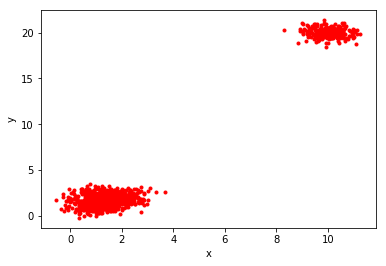

In [9]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers,1000,0.5)
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='.', label='see')  
plt.xlabel('x')  
plt.ylabel('y')  

5.调用GMM函数进行聚类，并返回ARI，画出ARI随着聚类的类别个数增加而改变的图像。  

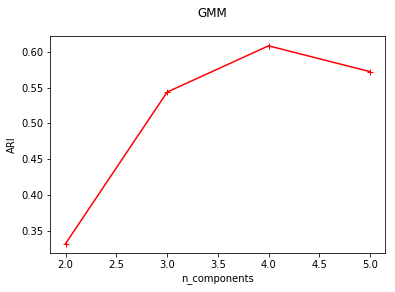

In [10]:
nums,ARIs = test_GMM_n_components(X,labels_true)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,ARIs,marker='+',color='r')
ax.set_xlabel("n_components")
ax.set_ylabel("ARI")
fig.suptitle("GMM")
plt.show()

## 三、实验注意事项  

1.GaussianMixture参数   
**n_components** :混合高斯模型个数，默认为1   
**covariance_type** :协方差类型，包括{‘full’,‘tied’, ‘diag’, ‘spherical’}四种，分别对应完全协方差矩阵（元素都不为零），相同的完全协方差矩阵（HMM会用到），对角协方差矩阵（非对角为零，对角不为零），球面协方差矩阵（非对角为零，对角完全相同，球面特性），默认‘full’ 完全协方差矩阵。    
**tol** ：EM迭代停止阈值，默认为1e-3。   
**reg_covar** :协方差对角非负正则化，保证协方差矩阵均为正，默认为0。  
**max_iter** :最大迭代次数，默认100。   
**n_init** :初始化次数，用于产生最佳初始参数，默认为1。  
**init_params** : {‘kmeans’, ‘random’}, defaults to ‘kmeans’.初始化参数实现方式，默认用kmeans实现，也可以选择随机产生。  
**weights_init** :各组成模型的先验权重，可以自己设。   
**means_init** :初始化均值。  
**precisions_init**:初始化精确度（模型个数，特征个数）。  
**random_state** :随机数发生器。  
**warm_start** :若为True，则fit（）调用会以上一次fit（）的结果作为初始化参数，适合相同问题多次fit的情况，能加速收敛，默认为False。   
**verbose** :使能迭代信息显示，默认为0，可以为1或者大于1（显示的信息不同）。   
**verbose_interval** :与verbose挂钩，若使能迭代信息显示，设置多少次迭代后显示信息，默认10次。  

2.GaussianMixture方法  
**weights_** : array-like, shape (n_components,)每个高斯模型的权重。  
**means_** : array-like, shape (n_components, n_features)每个高斯模型的均值。  
**covariances_** : array-like，各混合物中各组分的协方差。形状取决于协方差形式：  
(n_components,)if 'spherical',  
(n_features, n_features)if 'tied',  
(n_components, n_features)if 'diag',  
(n_components, n_features, n_features) if 'full'。  
**precisions_** : array-like，混合物中各组分的精确矩阵。精度矩阵是协方差矩阵的逆矩阵。协方差矩阵是对称正定的，因此高斯混合可以等价地由精度矩阵参数化。存储精度矩阵而不是协方差矩阵使得在测试时计算新样本的对数似然性更有效。形状取决于协变量类型：  
(n_components,)if 'spherical',  
(n_features, n_features)if 'tied',  
(n_components, n_features)if 'diag',  
(n_components, n_features, n_features) if 'full'。  
**precisions_cholesky_** : array-like，每个混合组分的精确矩阵的Cholesky分解。精度矩阵是协方差矩阵的逆矩阵。协方差矩阵是对称正定的，因此高斯混合可以等价地由精度矩阵参数化。存储精度矩阵而不是协方差矩阵使得在测试时计算新样本的对数似然性更有效。形状取决于协变量类型：
(n_components,)if 'spherical',  
(n_features, n_features)if 'tied',  
(n_components, n_features)if 'diag',  
(n_components, n_features, n_features) if 'full'。   
**converged_** : bool当收敛时为True,否则为False。   
**n_iter_** : int，通过EM的最佳拟合所使用的步长数达到收敛。  
**lower_bound_** : float，使用EM算法之后的对数似然。  

3.GaussianMixture属性  
**aic(X)** ：在输入X上的当前模型的Akaike信息标准。    
**bic(X)** ：在输入X上的当前模型的贝叶斯信息准则。  
**fit(X, y=None)** ：用EM算法估计模型参数。  
**get_params(deep=True)** ：为模型获取参数。    
**predict(X)** ：使用训练模型预测X中的数据样本的标签。  
**predict_proba(X)** ：预测给定数据的每个分量的后验概率。  
**sample(n_samples=1)** ：从拟合高斯分布生成随机样本。  
**score(X, y=None)** ：计算给定数据X.的每个样本平均对数似然。  
**score_samples(X)** ：计算每个样本的加权对数概率。  
**set_params($**$params)** ：模型参数的设置。  

## 四、实验拓展  

1.了解ARI聚类评价指标。  
2.了解EM算法初值敏感性。  
3.试采用别的数据集尝试聚类。  
4.与K-means聚类进行比较。  